# Spaceship Titanic

- 두번째 시도
    - scikit-learn에서 제공해주는 LogisticRegression 함수를 이용해 로지스틱-회귀를 사용한 모델로 학습을 진행하였다.

## Import modules

In [1]:
import os
from datetime import datetime
from zipfile import ZipFile
from io import BytesIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

from scipy.special import expit

## Set envs

In [2]:
PATH_INPUT = './data/in/'
PATH_OUTPUT = './data/out/'
NOW_STR = datetime.now().strftime('%Y%m%d_%H%M%S')
PATH_OUTPUT_NOW = f'./data/out/{NOW_STR}/'

## Check Data

### Get Data

In [3]:
with ZipFile(PATH_INPUT + 'spaceship-titanic.zip') as f:
    print(f.namelist())

    df_train = pd.read_csv(BytesIO(f.read('train.csv')))
    df_test = pd.read_csv(BytesIO(f.read('test.csv')))
    df_sample = pd.read_csv(BytesIO(f.read('sample_submission.csv')))

['sample_submission.csv', 'test.csv', 'train.csv']


### Print Data

In [4]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
df_sample.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


## Data Preprocessing

In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### Delete Null Data

In [9]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

- HomePlanet,CryoSleep,Cabin,Destination,VIP: null -> delete

In [10]:
df_train.dropna(subset=['HomePlanet','CryoSleep','Cabin','Destination','VIP'], inplace=True)

- Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck: null -> most frequency

In [11]:
columns = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in columns:
    most_freq = df_train[col].mode()[0]
    df_train[col].fillna(value=most_freq, inplace=True)

In [12]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            177
Transported       0
dtype: int64

### Data Bias

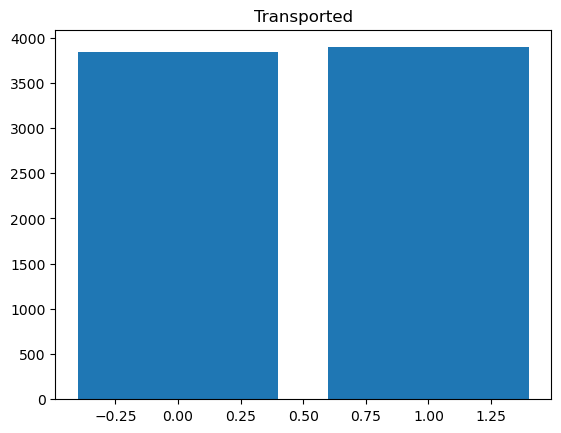

In [13]:
x = df_train['Transported'].unique()
y = [ len(df_train[df_train['Transported'] == i]) for i in x ]
plt.title('Transported')
plt.bar(x,y)
plt.show()

### String Data

In [14]:
non_num = ['HomePlanet', 'Cabin', 'Destination']
for col in non_num:
    uniq = df_train[col].unique()
    print("{0:=^40}".format(col))
    print(f'{uniq}  ({len(uniq)})')

===============HomePlanet===============
['Europa' 'Earth' 'Mars']  (3)
=================Cabin==================
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']  (6068)
==============Destination===============
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']  (3)


-> HomePlanet, Destination : One-hot Encoding

In [15]:
df_train = pd.get_dummies(df_train, columns=['HomePlanet', 'Destination'], dtype=int)

-> Cabin: Label Encoding

In [16]:
vocab = {
    "Cabin": {}
}

cabin_uniq = df_train['Cabin'].unique()
for idx,val in enumerate(cabin_uniq):
    vocab['Cabin'][val] = idx

df_train['Cabin'] = df_train['Cabin'].map(lambda v: vocab['Cabin'][v])

-> CryoSleep, VIP, Transported: Label Encoding (True: 1, False: 0)

In [17]:
df_train["CryoSleep"] = df_train["CryoSleep"].astype(int)
df_train["VIP"] = df_train["VIP"].astype(int)
df_train["Transported"] = df_train["Transported"].astype(int)

In [18]:
df_train

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1,0,0,0,1
1,0002_01,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,0,0,0,0,1
2,0003_01,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,1,0,0,0,1
3,0003_02,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,1,0,0,0,1
4,0004_01,0,3,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,6064,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,1,0,1,0,0
8689,9278_01,1,6065,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,1,0,0,0,1,0
8690,9279_01,0,6066,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1,0,0,0,0,1
8691,9280_01,0,6067,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,0,1,0,1,0,0


## Train

### Set Input data

In [19]:
exception_cols = ['PassengerId', 'Name']
dependants = ['Transported']
independents = [ i for i in df_train.keys() if i not in dependants and i not in exception_cols ]
# 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e'

X = df_train[independents]
Y = df_train[dependants]

In [20]:
X.shape, Y.shape

((7736, 15), (7736, 1))

### Build model

In [21]:
model = LogisticRegression(verbose=1)

### Train model

In [22]:
clf = model.fit(X, Y)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36219D+03    |proj g|=  9.26165D+05

At iterate   50    f=  4.05166D+03    |proj g|=  6.28835D+04

At iterate  100    f=  3.47073D+03    |proj g|=  2.01634D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16    100    116      1     0     0   2.016D+05   3.471D+03
  F =   3470.7302594114130     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/momo/anaconda3/envs/tfgpu/lib/python3.9/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/home/momo/anaconda3/envs/tfgpu/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


## Result

### Save result data

In [23]:
data_out_path = f'./data/out/{NOW_STR}/'

if not os.path.exists(os.path.join(data_out_path, "models")):
    os.makedirs(os.path.join(data_out_path, "models"))

# clf.save(os.path.join(data_out_path, "models", "model.h5"))
with open(os.path.join(data_out_path, "models", "model_scikit_logistic_regression.pkl"), "wb") as f:
    pickle.dump(clf, f)

## Validation

### Predict

In [24]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### Preprocess test data

In [25]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

- Drop null datas (kaggle에서 drop null을 허용하지 않음)

- fill null datas
    - 최빈값등 대체값으로 채우기에는 이는 검증하기 위한 실데이터이므로 대체값으로 채우면 가짜데이터가 되어버림.

In [26]:
columns = ['HomePlanet','CryoSleep','Cabin','Destination','VIP','Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for col in columns:
    df_test[col].fillna(value=0, inplace=True)

- HomePlanet, Destination: One-hot Encoding

In [27]:
df_test = pd.get_dummies(df_test, columns=['HomePlanet', 'Destination'], dtype=int)

- Cabin: Label Encoding

In [28]:
# 훈련 당시에 정한 사전 그대로 이용
for idx,val in enumerate(df_test['Cabin'].unique()):
    if val not in vocab['Cabin'].keys():
        vocab['Cabin'][val] = idx

df_test['Cabin'] = df_test['Cabin'].map(lambda v: vocab['Cabin'][v])

- CryoSleep, VIP, Transported: Label Encoding (True: 1, False: 0)

In [29]:
df_test["CryoSleep"] = df_test["CryoSleep"].map(lambda v: 1 if v else 0)
df_test["VIP"] = df_test["VIP"].map(lambda v: 1 if v else 0)

In [30]:
df_test.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HomePlanet_0,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,1,0,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,1,0,0,0,0,0,1
1,0018_01,0,1,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,1,0,0,0,0,0,1
2,0019_01,1,2,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,0,1,0,0,1,0,0
3,0021_01,0,3,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,0,1,0,0,0,0,1
4,0023_01,0,4,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,1,0,0,0,0,0,1


In [31]:
df_test[independents].isnull().sum()

CryoSleep                    0
Cabin                        0
Age                          0
VIP                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
dtype: int64

In [32]:
X_test = df_test[independents]

In [33]:
predictions = clf.predict(X_test)
predictions = list(predictions)

#### Export prediction to csv file

In [34]:
# 1에 가까우면 -> True, 0에 가까우면 False
predictions = list(map(lambda v: True if v > 0.5 else False, predictions))

In [35]:
output = pd.DataFrame({ "PassengerId": df_test['PassengerId'].to_list(), "Transported": predictions })
output_dir = os.path.join(PATH_OUTPUT_NOW, "predict")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output.to_csv(os.path.join(output_dir, 'predict_scikit_logistic_regression.csv'), index=False)